# **Proyek Analisis Data: Bike Sharing Dataset**


*   Wawan Firgiawan ⛹
*   Kirim Email: [wawanfirgiawan9@gmacil.com](mailto:wawanfirgiawan9@gmail.com) 📧




# **Pertanyaan Bisnis**

*   Apakah ada peran dari cuaca terhadap jumlah pengguna sepeda?
*   Bagaimana tren penggunaan sepeda dalam setahun, apakah tahun 2011 atau 2012 yang lebih unggul?
*   Apakah ada peran dari cuaca terhadap jumlah pengguna sepeda?
*   Apakah ada pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?



# **Menyiapkan semua library yang dibutuhkan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# **Data Wrangling**

## **Gathering Data**
Pada tahap ini kita akan mengumpulkan data yang telah kita kumpulkan. Karena saya memilih Bike Sharing Dataset, maka saya mengimpor file day.csv dan hour.csv

In [2]:
# Load Data day.csv
df_day = pd.read_csv("/content/drive/MyDrive/Program/Analisis Data - Dicoding/Data/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


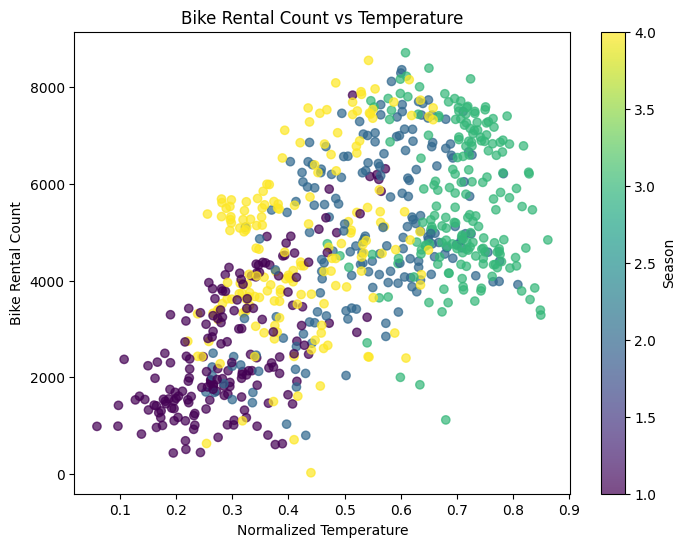

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_day['temp'], df_day['cnt'], c=df_day['season'], cmap='viridis', alpha=0.7)
plt.xlabel('Normalized Temperature')
plt.ylabel('Bike Rental Count')
plt.title('Bike Rental Count vs Temperature')
_ = plt.colorbar(label='Season')

In [4]:
# Load Data hour.csv
df_hour = pd.read_csv("/content/drive/MyDrive/Program/Analisis Data - Dicoding/Data/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


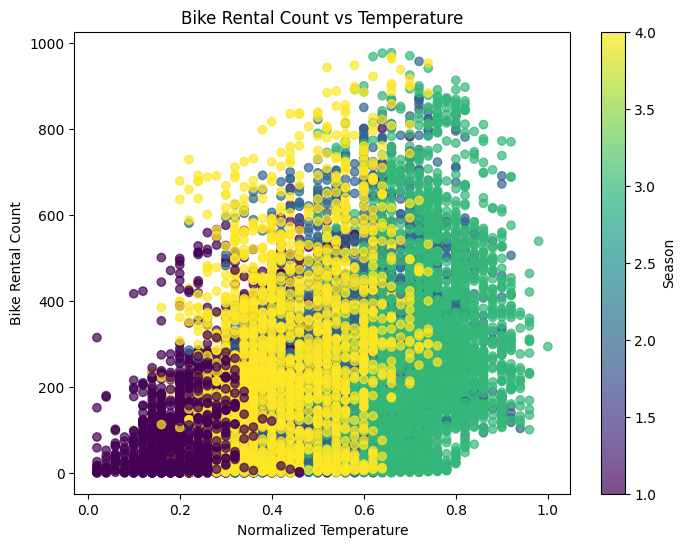

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_hour['temp'], df_hour['cnt'], c=df_hour['season'], cmap='viridis', alpha=0.7)
plt.xlabel('Normalized Temperature')
plt.ylabel('Bike Rental Count')
plt.title('Bike Rental Count vs Temperature')
_ = plt.colorbar(label='Season')

# **Assessing Data**

In [6]:
# Cek tipe Data yang digunakan pada dataset
print("Dataset Day")
print(df_day.dtypes)
print("==============================================")
print("Dataset Hour")
print(df_hour.dtypes)

Dataset Day
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
Dataset Hour
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [7]:
# Cek Missing Value dan Duplicated Data
print("Dataset Day")
print(df_day.isna().sum())
print("Jumlah duplikasi data: ", df_day.duplicated().sum())
print("==============================================")
print("Dataset Hour")
print(df_hour.isna().sum())
print("Jumlah duplikasi data: ", df_hour.duplicated().sum())

Dataset Day
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi data:  0
Dataset Hour
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi data:  0


In [8]:
# Decribe dataset
print("Dataset Day")
print(df_day.describe())
print("==============================================")
print("Dataset Hour")
print(df_hour.describe())

Dataset Day
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.4652

# **Cleaning Data**

1. Menghapus kolom yang tidak digunakan

> Hapus beberapa kolom yang tidak digunakan pada kasus ini



In [9]:
drop_col = ['instant']

for i in df_day.columns:
  if i in drop_col:
    df_day.drop(labels=i, axis=1, inplace=True)

df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


2. Mengubah beberapa detail tentang kolom


> Menyesuaikan nama kolom agar mudah dibaca



In [10]:
# Mengubah nama judul kolom
df_day.rename(columns={
    'dteday': 'dateday', 'yr': 'year', 'mnth': 'month', 'cnt': 'count'
    }, inplace=True)

df_day.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
# Mengonversi nilai numerik di kolom 'month' menjadi nama bulan
df_day['month'] = df_day['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Mengonversi nilai numerik di kolom 'weekday' menjadi nama hari
df_day['weekday'] = df_day['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

In [12]:
# Mengubah kolom dateday menjadi tipe datetime
df_day['dateday'] = pd.to_datetime(df_day['dateday'])

# Mengonversi beberapa kolom menjadi tipe categorical
category_columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
df_day[category_columns] = df_day[category_columns].astype('category')

df_day.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,1,0,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,Jan,0,Sun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,Jan,0,Mon,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,Jan,0,Tue,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,Jan,0,Wed,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# **Exploratory Data Analysis (EDA)**

In [14]:
# Pengelompokan penyewa sepeda berdasarkan Month
df_day.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-14-895aae0c9061>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

> Hasil menunjukkan bahwa bulan dengan rata-rata dan jumlah tertinggi adalah Juni, sedangkan Januari memiliki rata-rata dan jumlah terendah.

In [15]:
# Pengelompokan penyewa sepeda berdasarkan Weathersit
df_day.groupby(by='weathersit').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-15-defc8b0381b7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day.groupby(by='weathersit').agg({


count                           
             max  min         mean      sum
weathersit                                 
1           8714  431  4876.786177  2257952
2           8362  605  4035.862348   996858
3           4639   22  1803.285714    37869

> Hasil menunjukkan bahwa penyewa sepeda cenderung lebih sering menyewa sepeda saat cuaca **ke-1**, kemudian **ke-2** dan sangat sedikit pada cuaca **ke-3**.

In [16]:
# Pengelompokan penyewa sepeda berdasarkan Holiday
df_day.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-16-7d8151375a32>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

> Hasil menunjukkan bahwa penyewa sepeda lebih memilih menyewa pada hari **holiday 0** dari pada **holiday 1**.

In [17]:
# category_columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
# Pengelompokan penyewa sepeda berdasarkan Holiday
df_day.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-17-fee5966f362e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day.groupby(by='weekday').agg({


count                           
          max   min         mean     sum
weekday                                 
Fri      8362  1167  4690.288462  487790
Mon      7525    22  4338.123810  455503
Sat      8714   627  4550.542857  477807
Sun      8227   605  4228.828571  444027
Thu      7804   431  4667.259615  485395
Tue      7767   683  4510.663462  469109
Wed      8173   441  4548.538462  473048

> Hasil menunjukkan urutan rata-rata jumlah penyewa dari tertinggi ke terendah adalah: Saturday, Friday, Sunday, Wednesday, Thursday, Tuesday, dan terakhir adalah Monday.

In [18]:
# category_columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
# Pengelompokan penyewa sepeda berdasarkan Workingday
df_day.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-18-b955bcee9641>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day.groupby(by='workingday').agg({


count                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

> Hasil menunjukkan bahwa jumlah penyewaan sepeda lebih tinggi pada hari dengan insial 0 dibandingkan hari dengan inisial 1.

In [19]:
# category_columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
# Pengelompokan penyewa sepeda berdasarkan Workingday
df_day.groupby(by='season').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-19-c1342e91e6b6>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day.groupby(by='season').agg({


count                            
         max   min         mean      sum
season                                  
1       7836   431  2604.132597   471348
2       8362   795  4992.331522   918589
3       8714  1115  5644.303191  1061129
4       8555    22  4728.162921   841613

> Dari hasil analisis, dapat disimpulkan bahwa rata-rata temperatur tertinggi terjadi pada ke-3, diikuti oleh musim ke-4, musim ke-2, dan terakhir musim ke-1.

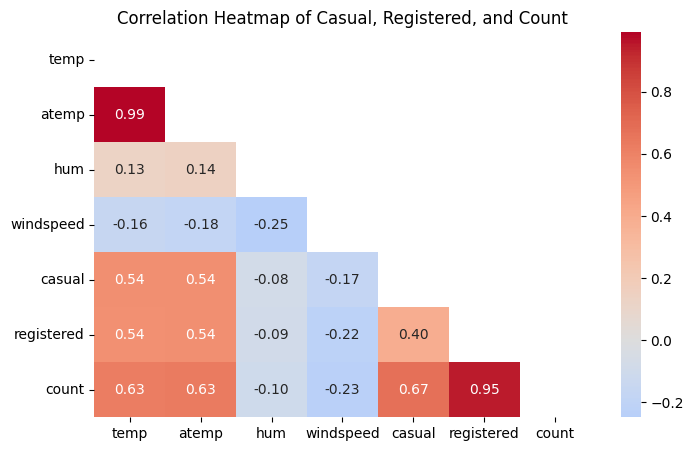

In [25]:
# Filter only relevant columns for correlation
correlation_matrix = df_day.corr(numeric_only=True)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting using the heatmap methode
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Correlation Heatmap of Casual, Registered, and Count")
plt.show()

Dari hasil analisis, diperoleh pernyataan sebagai berikut:

*   atemp dan temp sangat berkorelasi dengan nilai 0.99.
*   Kelembaban (hum) memiliki korelasi lemah dengan temp dan atemp, masing-masing sebesar 0.13 dan 0.14.
*   Penyewa kasual (casual) cukup berkorelasi dengan temp dan atemp (0.54) serta sedikit negatif dengan hum (-0.08).
*   Penyewa terdaftar (registered) menunjukkan pola yang sama dengan casual dan memiliki korelasi moderat dengan casual sebesar 0.40.
*   Jumlah total penyewa (count) berkorelasi kuat dengan temp, atemp, casual, dan registered dengan nilai masing-masing 0.63, 0.63, 0.67, dan 0.95, serta sedikit negatif dengan hum (-0.10).

# **Visualization & Explanatory Analysis**

#### 1. Apakah ada peran cuaca terhadap jumlah pengguna sepeda?

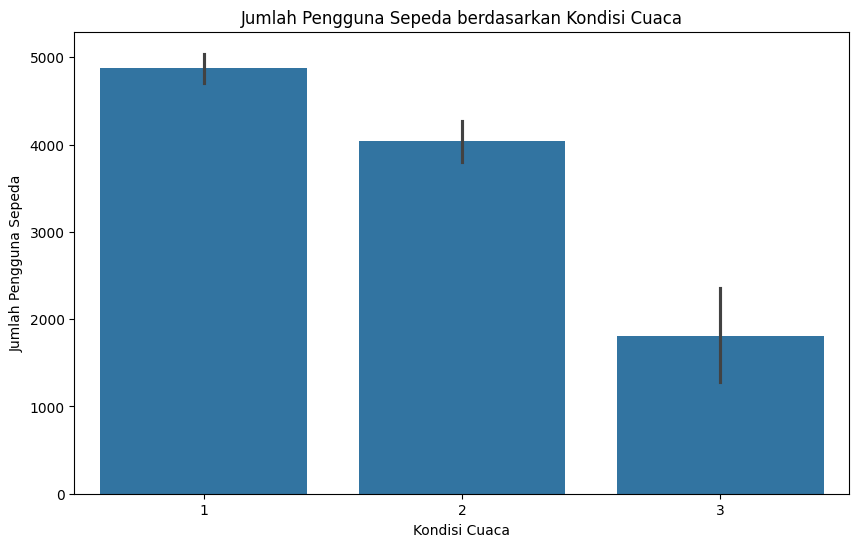

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='count',
    data=df_day)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

> Berdasarkan visualisasi data menggunakan boxplot, dapat disimpulkan bahwa terdapat hubungan yang jelas antara kondisi cuaca dan penyewa sepeda. Penyewa sepeda paling banyak pada kondisi 1, diikuti oleh cuaca 2. Sebaliknya, cuaca ke-3 adalah kondisi yang paling sedikit diminati.

#### 2. Apakah ada perbedaan yang tampak terhadap penggunaan sepeda pada workingday, holiday, dan weekday?

<ipython-input-31-c5fb32203c95>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-31-c5fb32203c95>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-31-c5fb32203c95>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


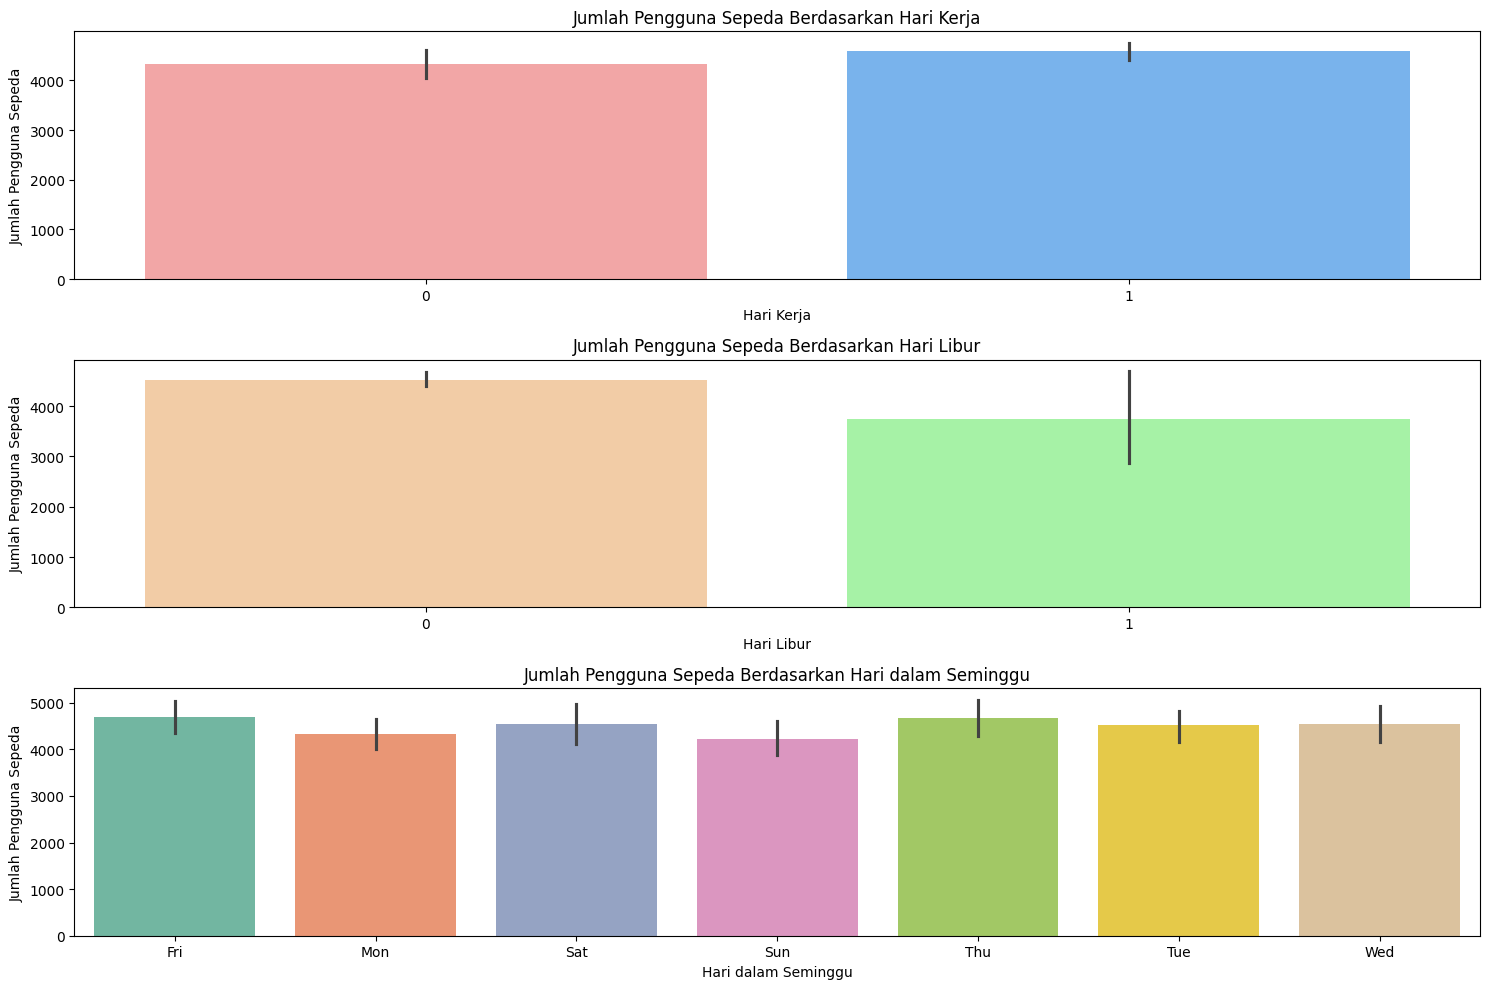

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Warna untuk setiap bar
colors_workingday = ['#FF9999', '#66B3FF']
colors_holiday = ['#FFCC99', '#99FF99']
colors_weekday = sns.color_palette("Set2", 7)

# Jumlah Pengguna Sepeda berdasarkan Hari Kerja
sns.barplot(
    x='workingday',
    y='count',
    data=df_day,
    ax=axes[0],
    palette=colors_workingday
)
axes[0].set_title('Jumlah Pengguna Sepeda Berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Jumlah Pengguna Sepeda berdasarkan Hari Libur
sns.barplot(
    x='holiday',
    y='count',
    data=df_day,
    ax=axes[1],
    palette=colors_holiday
)
axes[1].set_title('Jumlah Pengguna Sepeda Berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu
sns.barplot(
    x='weekday',
    y='count',
    data=df_day,
    ax=axes[2],
    palette=colors_weekday
)
axes[2].set_title('Jumlah Pengguna Sepeda Berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

# Mengatur tata letak
plt.tight_layout()
plt.show()

Berdasarkan visualisasi data menggunakan barplot, dapat disimpulkan sebagai berikut:

* Jumlah penyewa sepeda lebih besar pada hari kerja dengan Label 1 dari pada label 0.
*Jumlah penyewa sepeda lebih besar pada hari Libur dengan Label 0 dari pada label 1.
* Jumlah penyewa sepeda lebih tinggi pada Friday dan Paling sedikit pada Sunday.

**Kesimpulan**

1. **Hubungan Cuaca dan Penyewa Sepeda:** Berdasarkan visualisasi data menggunakan boxplot, terdapat hubungan yang jelas antara kondisi cuaca dan jumlah penyewa sepeda. Penyewa sepeda paling banyak ditemukan pada kondisi cuaca tertentu (Label 1), diikuti oleh kondisi cuaca lainnya (Label 2). Sebaliknya, kondisi cuaca yang ketiga (Label 3) menunjukkan minat penyewa sepeda yang paling rendah, mengindikasikan bahwa cuaca berperan penting dalam mempengaruhi jumlah pengguna sepeda.

2. **Pengaruh Hari Terhadap Penyewa Sepeda:** Berdasarkan visualisasi data menggunakan barplot, dapat disimpulkan bahwa jumlah penyewa sepeda lebih tinggi pada hari kerja (Label 1) dibandingkan dengan hari libur (Label 0). Sebaliknya, jumlah penyewa sepeda pada hari libur lebih besar saat Label 0 dibandingkan Label 1. Selain itu, jumlah penyewa sepeda paling tinggi terjadi pada hari Jumat, sementara hari Minggu menunjukkan jumlah penyewa paling sedikit. Hal ini menunjukkan adanya perbedaan yang signifikan dalam penggunaan sepeda antara hari kerja, hari libur, dan hari dalam seminggu.

